In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

In [2]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-06-21  112.014999
1 2022-06-22  112.033997
2 2022-06-23  112.684502
3 2022-06-24  118.538002
4 2022-06-27  116.622498


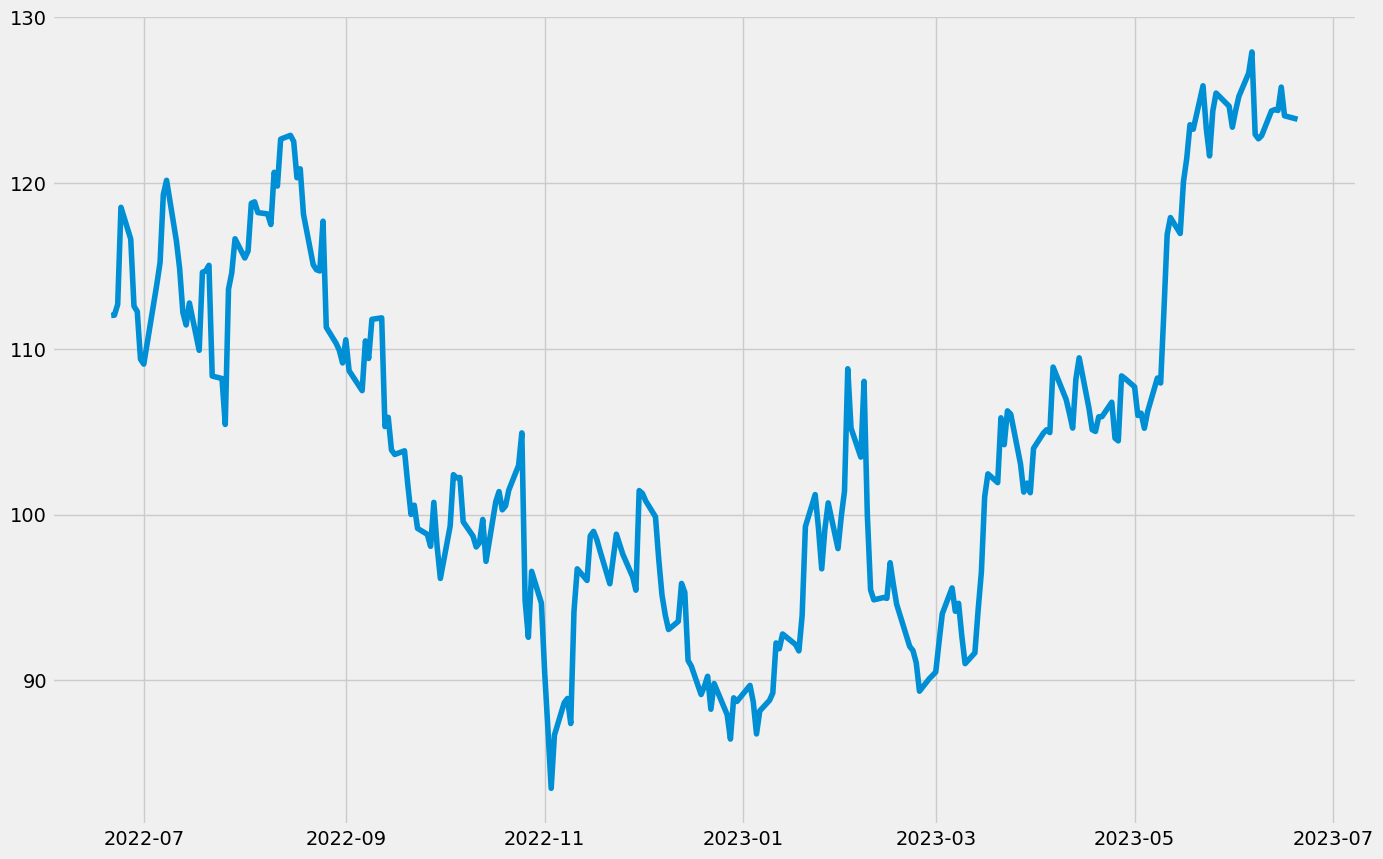

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

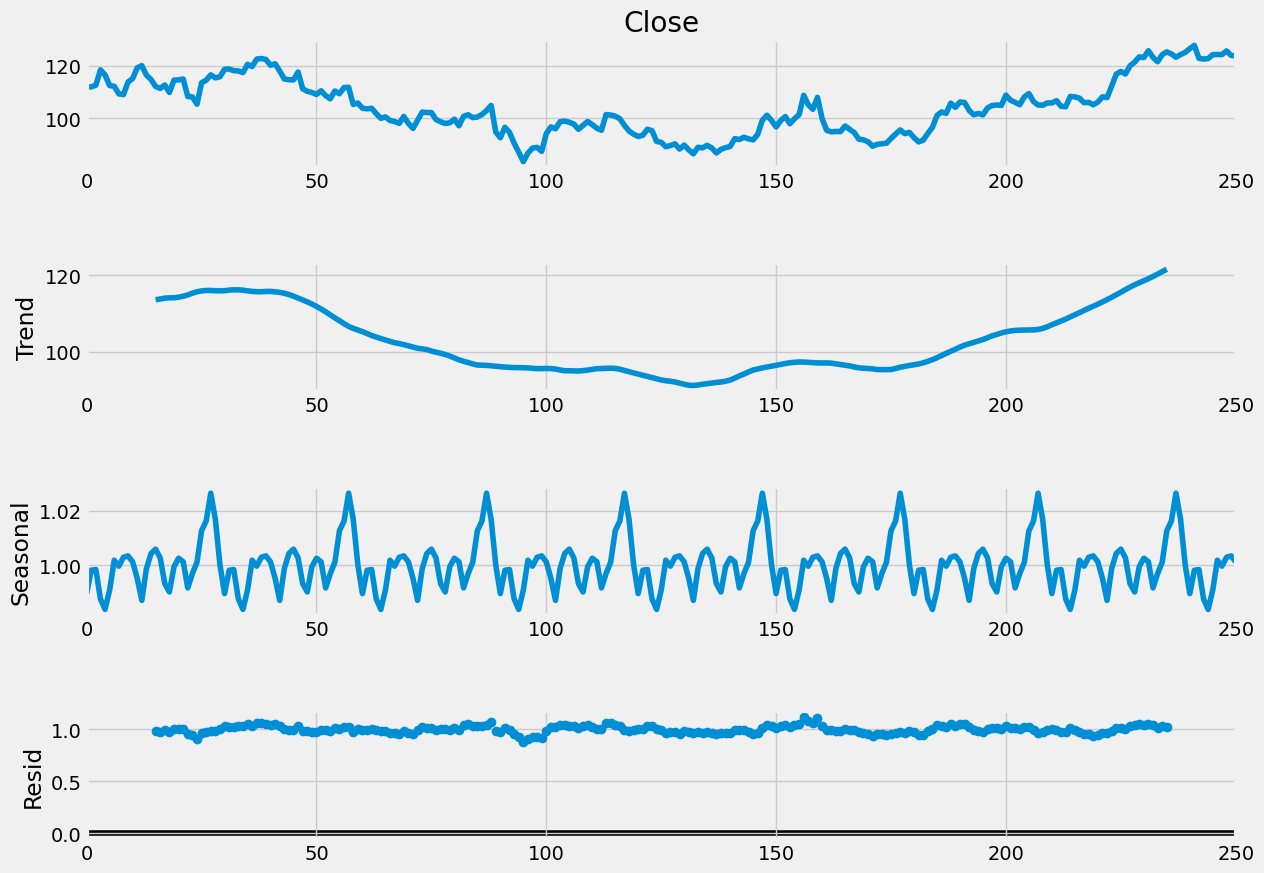

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

In [7]:
from pmdarima import auto_arima
auto_arima(data["Close"],m=12,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1285.072, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1221.509, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1287.066, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1188.544, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1186.558, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1219.635, Time=0.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1188.539, Time=0.19 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1189.127, Time=0.43 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1188.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -590.279
Date:                            Wed, 21 Jun 2023   AIC                           1186.558
Time:                                    15:14:14   BIC                           1196.974
Sample:                                         0   HQIC                          1190.756
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6992      0.052    -13.541      0.000      -0.800      -0.598
ar.S.L24      -0.3930      0.056     -6.985      0.000      -0.503      -0.283
sigma2         8.0922      0.623     12.989      0.000       6.871       9.313
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                13.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
p, d, q = 2, 1, 0
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -588.488
Date:                            Wed, 21 Jun 2023   AIC                           1186.977
Time:                                    15:18:12   BIC                           1204.338
Sample:                                         0   HQIC                          1193.974
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0101      0.064     -0.159      0.874      -0.135       0.115
ar.L2         -0.1225      0.069   

In [12]:
predictions = model.predict(len(data), len(data)+40)
print(predictions)

251    125.184100
252    126.027845
253    126.285505
254    124.745781
255    125.074005
256    124.782023
257    125.557688
258    126.260262
259    128.321328
260    130.381116
261    129.900281
262    129.744034
263    131.665155
264    132.894343
265    134.175524
266    132.136664
267    133.215997
268    132.143048
269    132.144740
270    133.476114
271    134.516478
272    135.230638
273    134.061363
274    134.357334
275    135.675489
276    136.859981
277    137.838378
278    134.760301
279    135.071521
280    134.744581
281    135.573351
282    136.212397
283    137.112813
284    138.506125
285    137.313184
286    137.270750
287    138.773454
288    139.833199
289    140.609244
290    138.460898
291    139.005873
Name: predicted_mean, dtype: float64


<AxesSubplot: >

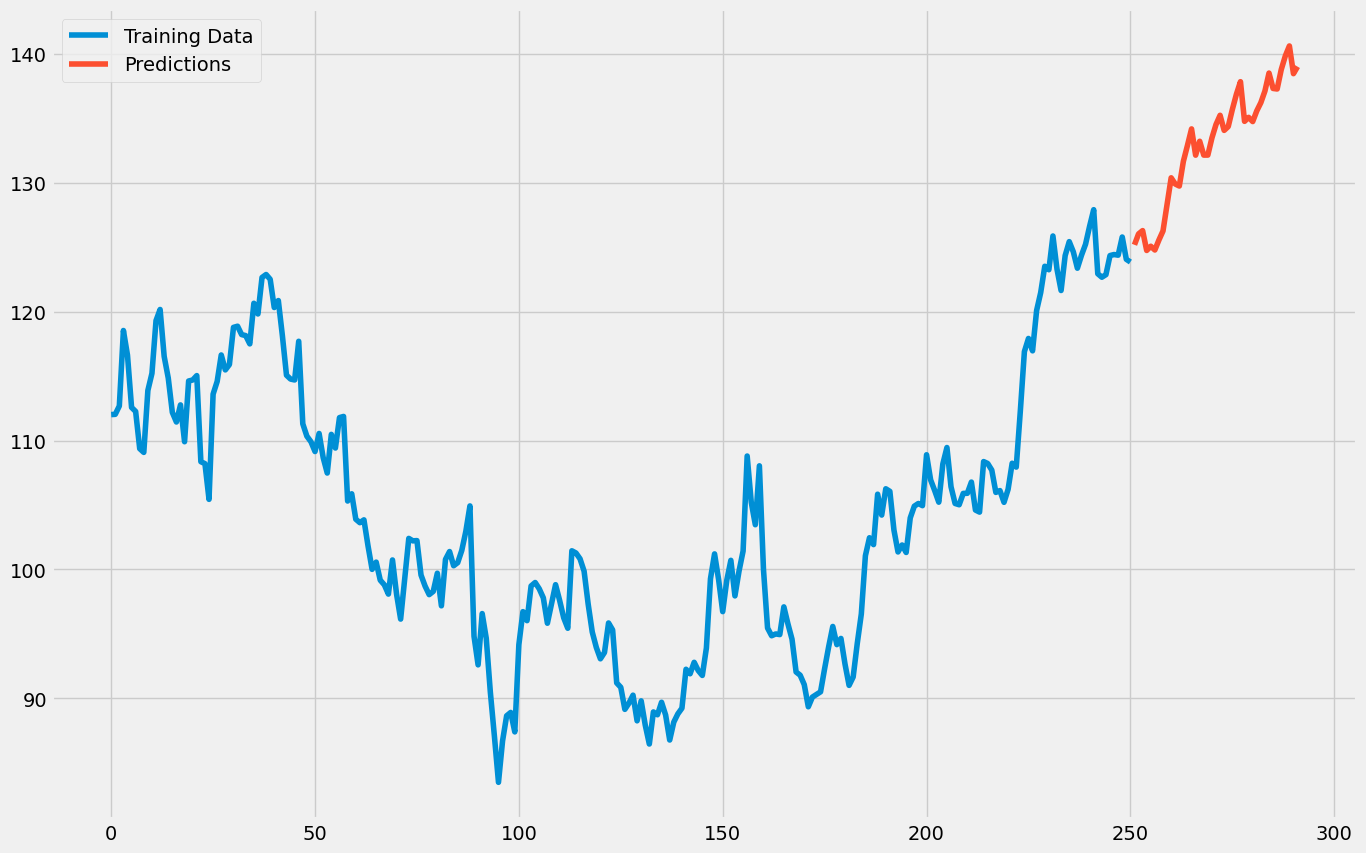

In [13]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")